## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [8]:
results = {}
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 63us/step - loss: 6.0015 - acc: 0.2701 - val_loss: 5.8064 - val_acc: 0.3484
Epoch 2/50
50000/50000 [==============================] - 3s 60us/step - loss: 5.7176 - acc: 0.3656 - val_loss: 5.6383 - val_acc: 0.3803
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 5.5682 - acc: 0.3933 - val_loss: 5.5002 - val_acc: 0.4047
Epoch 4/50
50000/50000 [==============================] - 3s 61us/step - loss: 5.4459 - acc: 0.4159 - val_loss: 5.3940 - val_acc: 0.4170
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.3380 - acc: 0.4310 - val_loss: 5.2866 - val_acc: 0.4410
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 5.2361 - acc: 0.4439 - val_loss: 5.1986 - val_acc: 0.4466
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.1421 - acc: 0.4575 - val_loss: 5.1179 - val_acc

50000/50000 [==============================] - 3s 58us/step - loss: 1.8015 - acc: 0.3676 - val_loss: 1.7619 - val_acc: 0.3802
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7205 - acc: 0.3985 - val_loss: 1.6993 - val_acc: 0.4064
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6643 - acc: 0.4172 - val_loss: 1.6398 - val_acc: 0.4210
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6161 - acc: 0.4366 - val_loss: 1.6028 - val_acc: 0.4356
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5747 - acc: 0.4502 - val_loss: 1.5731 - val_acc: 0.4449
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5412 - acc: 0.4614 - val_loss: 1.5425 - val_acc: 0.4554
Epoch 8/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5098 - acc: 0.4711 - val_loss: 1.5212 - val_acc: 0.4610
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 59us/step - loss: 1.7089 - acc: 0.4004 - val_loss: 1.6694 - val_acc: 0.4134
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6487 - acc: 0.4227 - val_loss: 1.6401 - val_acc: 0.4188
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6038 - acc: 0.4377 - val_loss: 1.5941 - val_acc: 0.4369
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5647 - acc: 0.4523 - val_loss: 1.5655 - val_acc: 0.4438
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5327 - acc: 0.4616 - val_loss: 1.5377 - val_acc: 0.4567
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5034 - acc: 0.4741 - val_loss: 1.5126 - val_acc: 0.4654
Epoch 9/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4772 - acc: 0.4817 - val_loss: 1.4973 - val_acc: 0.4711
Epoch 10/50
50000/50000 [===========================

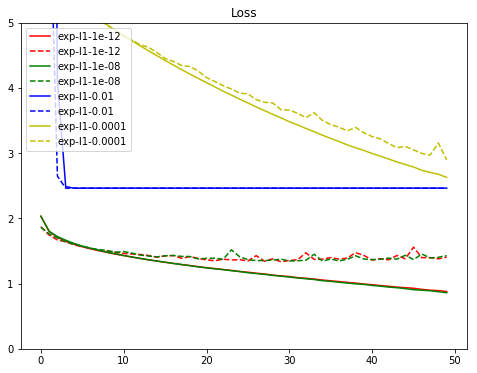

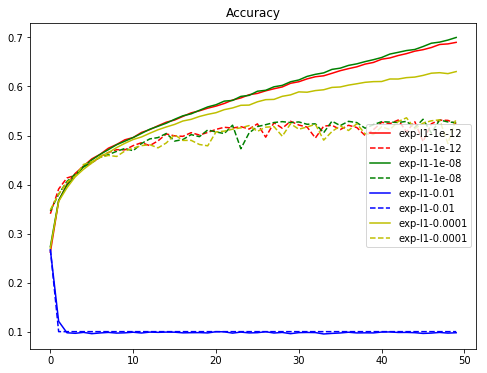

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()